In [1]:
#导入第三方库
import torch #pytorch框架
import pandas as pd #数据集读入库
import matplotlib.pyplot as plt #绘制图表
import torch.nn as nn #模型中的网络层使用
from torch import optim #优化器使用
from torch.utils.data import DataLoader, TensorDataset #数据集处理
from sklearn.model_selection import  train_test_split #数据划分

In [2]:
def round_half_int(x):
    return round(x * 2) / 2

In [3]:
#读取文件
movies_df = pd.read_csv("./movies.csv")
ratings_df = pd.read_csv("./ratings.csv")
tags_df = pd.read_csv("./tags.csv")

In [4]:
movies_df #9742部电影，每部电影的名字和类型都记录在案

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [5]:
ratings_df #100836次评分，每个用户对每个电影的评分都记录在案

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [6]:
tags_df #每个用户给电影的打的标签都记录在案

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [7]:
merged_movies_rating_df = pd.merge(ratings_df,movies_df,on="movieId",how="inner") #将需要的数据进行整合到一份表中

In [8]:
merged_movies_rating_df #在每一次评分中将电影的名字和类型加进去

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [9]:
merged_movies_rating_df["genres"].unique() #查看genres列中的唯一值

array(['Adventure|Animation|Children|Comedy|Fantasy', 'Comedy|Romance',
       'Action|Crime|Thriller', 'Mystery|Thriller',
       'Crime|Mystery|Thriller', 'Action|Comedy|Horror|Thriller',
       'Adventure|Comedy|Crime|Romance', 'Action|Drama|War',
       'Action|Drama|Romance|War', 'Comedy|War', 'Action|Romance|Western',
       'Comedy', 'Adventure|Comedy', 'Comedy|Drama',
       'Action|Adventure|Sci-Fi', 'Comedy|Crime|Drama|Thriller',
       'Action|Crime|Drama|Thriller', 'Comedy|Drama|Romance|War',
       'Adventure|Children|Romance', 'Action|Comedy|Crime|Fantasy',
       'Action|Thriller', 'Thriller', 'Action|Adventure|Sci-Fi|Thriller',
       'Drama|War', 'Comedy|Romance|Thriller',
       'Action|Adventure|Comedy|Romance', 'Action|Drama|Western',
       'Adventure|Drama|Western', 'Crime|Horror|Thriller',
       'Animation|Children|Fantasy|Musical',
       'Action|Adventure|Mystery|Thriller',
       'Adventure|Animation|Children|Fantasy|Musical',
       'Adventure|Animation|Chil

In [10]:
# 将"genres"列分割成多个列
genres_split = merged_movies_rating_df['genres'].str.get_dummies('|')  #使用get_dummies这个方法将genres这一列的数据分割出来形成新的特征列
genres_split #将标签分割开来

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
100832,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
100833,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
100834,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [11]:
# 将新生成的列与原始数据合并
df = pd.concat([merged_movies_rating_df, genres_split], axis=1)
df

,userId,movieId,rating,timestamp,title,genres,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [12]:
#删除generes列
df.drop(columns=["genres"],inplace=True)

In [13]:
df #查看处理好的数据

,userId,movieId,rating,timestamp,title,(no genres listed),Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,964982703,Toy Story (1995),0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,5,1,4.0,847434962,Toy Story (1995),0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,7,1,4.5,1106635946,Toy Story (1995),0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,15,1,2.5,1510577970,Toy Story (1995),0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,17,1,4.5,1305696483,Toy Story (1995),0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100833,610,160836,3.0,1493844794,Hazard (2005),0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100834,610,163937,3.5,1493848789,Blair Witch (2016),0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [14]:
df['title'] #观察标题列

0                         Toy Story (1995)
1                         Toy Story (1995)
2                         Toy Story (1995)
3                         Toy Story (1995)
4                         Toy Story (1995)
                        ...               
100831                    Bloodmoon (1997)
100832    Sympathy for the Underdog (1971)
100833                       Hazard (2005)
100834                  Blair Witch (2016)
100835                           31 (2016)
Name: title, Length: 100836, dtype: object

In [15]:
df['title'] = df['title'].astype('category').cat.codes # 为电影标题创建唯一的整数编码

In [16]:
df['title']

0         8871
1         8871
2         8871
3         8871
4         8871
          ... 
100831    1193
100832    8251
100833    3818
100834    1150
100835     107
Name: title, Length: 100836, dtype: int16

In [17]:
df #查看数据

,userId,movieId,rating,timestamp,title,(no genres listed),Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,964982703,8871,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,5,1,4.0,847434962,8871,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,7,1,4.5,1106635946,8871,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,15,1,2.5,1510577970,8871,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,17,1,4.5,1305696483,8871,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,1193,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100832,610,160527,4.5,1479544998,8251,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100833,610,160836,3.0,1493844794,3818,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100834,610,163937,3.5,1493848789,1150,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [18]:
df.info() #检索信息

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   userId              100836 non-null  int64  
 1   movieId             100836 non-null  int64  
 2   rating              100836 non-null  float64
 3   timestamp           100836 non-null  int64  
 4   title               100836 non-null  int16  
 5   (no genres listed)  100836 non-null  int64  
 6   Action              100836 non-null  int64  
 7   Adventure           100836 non-null  int64  
 8   Animation           100836 non-null  int64  
 9   Children            100836 non-null  int64  
 10  Comedy              100836 non-null  int64  
 11  Crime               100836 non-null  int64  
 12  Documentary         100836 non-null  int64  
 13  Drama               100836 non-null  int64  
 14  Fantasy             100836 non-null  int64  
 15  Film-Noir           100836 non-nul

In [19]:
#同一电影的打分取平均值
rating_df = df.groupby(['movieId'])['rating'].mean().apply(round_half_int).reset_index()
rating_df

,movieId,rating
0,1,4.0
1,2,3.5
2,3,3.5
3,4,2.5
4,5,3.0
...,...,...
9719,193581,4.0
9720,193583,3.5
9721,193585,3.5
9722,193587,3.5


In [20]:
# 删除同一movie_id的重复数据，只保留一个
df_unique = df.drop_duplicates(subset='movieId', keep='first')
df_unique

,userId,movieId,rating,timestamp,title,(no genres listed),Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,964982703,8871,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
215,1,3,4.0,964981247,3661,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
267,1,6,4.0,964982224,3845,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
369,1,47,5.0,964983815,7523,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
572,1,50,5.0,964982931,9119,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,1193,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100832,610,160527,4.5,1479544998,8251,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100833,610,160836,3.0,1493844794,3818,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100834,610,163937,3.5,1493848789,1150,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [21]:
df_unique=df_unique.sort_values(by='movieId').reset_index()
df_unique

,index,userId,movieId,rating,timestamp,title,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,1,1,4.0,964982703,8871,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,27150,6,2,4.0,845553522,4645,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,215,1,3,4.0,964981247,3661,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,27260,6,4,3.0,845554349,9225,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,27267,6,5,5.0,845553938,2967,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9719,92965,184,193581,4.0,1537109082,1108,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9720,92966,184,193583,3.5,1537109545,6145,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9721,92967,184,193585,3.5,1537109805,3096,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9722,92968,184,193587,3.5,1537110021,1460,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df_unique.drop(columns=['rating'],inplace=True)
df_unique

,index,userId,movieId,timestamp,title,(no genres listed),Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,1,1,964982703,8871,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,27150,6,2,845553522,4645,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,215,1,3,964981247,3661,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,27260,6,4,845554349,9225,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,27267,6,5,845553938,2967,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9719,92965,184,193581,1537109082,1108,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9720,92966,184,193583,1537109545,6145,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9721,92967,184,193585,1537109805,3096,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9722,92968,184,193587,1537110021,1460,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df_unique = pd.merge(df_unique, rating_df, on='movieId')
df_unique

,index,userId,movieId,timestamp,title,(no genres listed),Action,Adventure,Animation,Children,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating
0,0,1,1,964982703,8871,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,4.0
1,27150,6,2,845553522,4645,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,3.5
2,215,1,3,964981247,3661,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3.5
3,27260,6,4,845554349,9225,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2.5
4,27267,6,5,845553938,2967,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9719,92965,184,193581,1537109082,1108,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,4.0
9720,92966,184,193583,1537109545,6145,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3.5
9721,92967,184,193585,1537109805,3096,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.5
9722,92968,184,193587,1537110021,1460,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,3.5


In [24]:
df_unique.drop(columns=['index'],inplace=True)
df_unique

,userId,movieId,timestamp,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating
0,1,1,964982703,8871,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,4.0
1,6,2,845553522,4645,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,3.5
2,1,3,964981247,3661,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,3.5
3,6,4,845554349,9225,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,2.5
4,6,5,845553938,2967,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9719,184,193581,1537109082,1108,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,4.0
9720,184,193583,1537109545,6145,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,3.5
9721,184,193585,1537109805,3096,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.5
9722,184,193587,1537110021,1460,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3.5


In [25]:
# 合并唯一投票结果到原始数据集
df = df_unique
df

,userId,movieId,timestamp,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating
0,1,1,964982703,8871,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,4.0
1,6,2,845553522,4645,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,3.5
2,1,3,964981247,3661,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,3.5
3,6,4,845554349,9225,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,2.5
4,6,5,845553938,2967,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9719,184,193581,1537109082,1108,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,4.0
9720,184,193583,1537109545,6145,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,3.5
9721,184,193585,1537109805,3096,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.5
9722,184,193587,1537110021,1460,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3.5


In [26]:
df=df.sort_values(by=['userId','movieId']).reset_index()
df=df.drop(columns='index')
df

,userId,movieId,timestamp,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating
0,1,1,964982703,8871,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,4.0
1,1,3,964981247,3661,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,3.5
2,1,6,964982224,3845,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4.0
3,1,47,964983815,7523,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,4.0
4,1,50,964982931,9119,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9719,610,160341,1479545749,1193,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2.5
9720,610,160527,1479544998,8251,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.5
9721,610,160836,1493844794,3818,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3.0
9722,610,163937,1493848789,1150,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,3.5


In [27]:
#unique_votes = df.groupby(["userId", "movieId"])["rating"].mean().round().reset_index()

In [28]:
#df_unique = df.drop_duplicates(subset="movieId", keep="first")

In [29]:
#df = pd.merge(df_unique,unique_votes,on=["userId", "movieId"],how="left",suffixes=("", "_unique"),)

In [30]:
df=df.drop(columns=["userId"])
df=df.drop(columns=["timestamp"])
#df=df.drop(columns=["rating"])
df

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating
0,1,8871,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,4.0
1,3,3661,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,3.5
2,6,3845,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,4.0
3,47,7523,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,4.0
4,50,9119,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9719,160341,1193,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2.5
9720,160527,8251,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4.5
9721,160836,3818,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3.0
9722,163937,1150,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,3.5


In [31]:
df.shape #观察数据量和特征列数量

(9724, 23)

In [32]:
# 数据划分选取特征列和目标列
#features = df.iloc[:,df.columns!="rating_unique"].values
#target = df.iloc[:,df.columns=="rating_unique"].values

In [33]:
# 数据划分选取特征列和目标列
features = df.iloc[:,df.columns!="rating"].values
target = df.iloc[:,df.columns=="rating"].values

In [34]:
features

array([[     1,   8871,      0, ...,      0,      0,      0],
       [     3,   3661,      0, ...,      0,      0,      0],
       [     6,   3845,      0, ...,      1,      0,      0],
       ...,
       [160836,   3818,      0, ...,      1,      0,      0],
       [163937,   1150,      0, ...,      1,      0,      0],
       [163981,    107,      0, ...,      0,      0,      0]], dtype=int64)

In [35]:
target

array([[4. ],
       [3.5],
       [4. ],
       ...,
       [3. ],
       [3.5],
       [3.5]])

In [36]:
#划分第一个训练集和测试集
X_train,X_test,Y_train,Y_test = train_test_split(features,target,test_size=0.1,random_state=99)

In [37]:
# 划分第二个训练集和测试集
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(features, target, test_size=0.1, random_state=2021)

# 划分第三个训练集和测试集
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(features, target, test_size=0.1, random_state=2000)

In [38]:
X_train

array([[79242,  4732,     0, ...,     0,     0,     0],
       [69306,  8282,     0, ...,     1,     0,     0],
       [ 3417,  2040,     0, ...,     0,     0,     0],
       ...,
       [ 1010,  5246,     0, ...,     0,     0,     0],
       [ 4231,  7831,     0, ...,     0,     0,     0],
       [31435,  7255,     0, ...,     0,     0,     0]], dtype=int64)

In [39]:
Y_train

array([[3. ],
       [3. ],
       [3. ],
       ...,
       [3. ],
       [3.5],
       [4.5]])

In [40]:
#数据转换，转换成为能够使用torch训练类型和验证的类型
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train,dtype=torch.float32)
X_test_tensor = torch.tensor(X_test,dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test,dtype=torch.float32)
X_train_2_tensor = torch.tensor(X_train_2, dtype=torch.float32)
Y_train_2_tensor = torch.tensor(Y_train_2,dtype=torch.float32)
X_test_2_tensor = torch.tensor(X_test_2,dtype=torch.float32)
Y_test_2_tensor = torch.tensor(Y_test_2,dtype=torch.float32)
X_train_3_tensor = torch.tensor(X_train_3, dtype=torch.float32)
Y_train_3_tensor = torch.tensor(Y_train_3,dtype=torch.float32)
X_test_3_tensor = torch.tensor(X_test_3,dtype=torch.float32)
Y_test_3_tensor = torch.tensor(Y_test_3,dtype=torch.float32)

In [41]:
Y_train_tensor

tensor([[3.0000],
        [3.0000],
        [3.0000],
        ...,
        [3.0000],
        [3.5000],
        [4.5000]])

In [42]:
X_train_tensor

tensor([[7.9242e+04, 4.7320e+03, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [6.9306e+04, 8.2820e+03, 0.0000e+00,  ..., 1.0000e+00, 0.0000e+00,
         0.0000e+00],
        [3.4170e+03, 2.0400e+03, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [1.0100e+03, 5.2460e+03, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [4.2310e+03, 7.8310e+03, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [3.1435e+04, 7.2550e+03, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])

In [43]:
#数据转换为批次进行训练
train_data = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
train_data_2 = TensorDataset(X_train_2_tensor, Y_train_2_tensor)
train_loader_2 = DataLoader(train_data_2, batch_size=128, shuffle=True)
train_data_3 = TensorDataset(X_train_3_tensor, Y_train_3_tensor)
train_loader_3 = DataLoader(train_data_3, batch_size=128, shuffle=True)

In [44]:
#多层感知机模型参数
#创建多层感知机模型，神经网络
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.conv1 = nn.Conv1d(1, 64, kernel_size=3)
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * ((input_size - 2) // 2), 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64,32)
        self.fc5 = nn.Linear(32,16)
        self.fc6 = nn.Linear(16,1)


    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.pool(x)
        x = self.flatten(x)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        x = nn.functional.relu(x)
        x = self.fc3(x)
        x = nn.functional.relu(x)
        x = self.fc4(x)
        x = nn.functional.relu(x)
        x = self.fc5(x)
        x = nn.functional.relu(x)
        x = self.fc6(x)
        return x

In [45]:
X_train.shape[1] #特征列的数量

22

In [46]:
def compute_accuracy(predictions, targets, threshold=0.5):
#param predictions: 预测值
#param targets: 真实值
#param threshold: 判定为正确预测的阈值
    correct = torch.abs(predictions - targets) <= threshold
    return correct.float().mean()
def round_to_nearest_half(tensor):
    return torch.round(tensor * 2) / 2

In [47]:
model = MLP(X_train.shape[1]) # 输入量为特征列的数量

# 使用均方误差损失函数
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 100
model_acc = 0.0
train_loss_data_1 = []
test_loss_data_1 = []

for epoch in range(epochs):
    total_loss = 0  # 初始化累积损失值
    total_batches = 0  # 初始化批次计数
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X.unsqueeze(1))
        loss = criterion(outputs, batch_y) 
        loss.backward()
        optimizer.step()
        total_loss+=loss.item()
        total_batches+=1
    average_loss = total_loss / total_batches
    train_loss_data_1.append(average_loss)
    print(f"Epoch {epoch+1}/{epochs}, Average Loss: {average_loss}")

# 模型评估
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor.unsqueeze(1))
        rounded_outputs = torch.tensor([round_to_nearest_half(x) for x in test_outputs])
        test_loss = criterion(test_outputs, Y_test_tensor)  # 计算测试损失
        test_loss_data_1.append(test_loss.item())
        test_accuracy = compute_accuracy(rounded_outputs, Y_test_tensor)
        print(f'Test Loss: {test_loss.item()}')

# 打印准确率
    print(f'Test Accuracy: {test_accuracy.item() * 100:.2f}%')
    if model_acc < test_accuracy*100:
        model_acc = test_accuracy*100
    test_loss_data_1.append(test_loss.item())
print(f'Test Accuracy max: {model_acc:.2f}%')

Epoch 1/100, Average Loss: 469.13192962563556
Test Loss: 10.352592468261719
Test Accuracy: 16.42%
Epoch 2/100, Average Loss: 7.4299196920533115
Test Loss: 7.266979217529297
Test Accuracy: 24.53%
Epoch 3/100, Average Loss: 4.91140079498291
Test Loss: 4.2242817878723145
Test Accuracy: 28.22%
Epoch 4/100, Average Loss: 3.7423448251641314
Test Loss: 2.4660823345184326
Test Accuracy: 35.60%
Epoch 5/100, Average Loss: 3.061736091323521
Test Loss: 3.6757137775421143
Test Accuracy: 26.47%
Epoch 6/100, Average Loss: 65.59439114038496
Test Loss: 6.746076583862305
Test Accuracy: 25.01%
Epoch 7/100, Average Loss: 2.317314374274102
Test Loss: 1.5912060737609863
Test Accuracy: 44.48%
Epoch 8/100, Average Loss: 1.577592626861904
Test Loss: 1.3217941522598267
Test Accuracy: 49.89%
Epoch 9/100, Average Loss: 1.3118860635204592
Test Loss: 1.1215757131576538
Test Accuracy: 52.93%
Epoch 10/100, Average Loss: 1.1768637670986895
Test Loss: 1.2103315591812134
Test Accuracy: 52.90%
Epoch 11/100, Average Loss:

Epoch 85/100, Average Loss: 0.7619766847810884
Test Loss: 0.7190970182418823
Test Accuracy: 62.53%
Epoch 86/100, Average Loss: 0.7691240215647048
Test Loss: 0.7273451685905457
Test Accuracy: 62.93%
Epoch 87/100, Average Loss: 0.7449345415916996
Test Loss: 0.7285439372062683
Test Accuracy: 63.57%
Epoch 88/100, Average Loss: 0.7503719165705253
Test Loss: 0.7117235064506531
Test Accuracy: 58.70%
Epoch 89/100, Average Loss: 0.7735859362975411
Test Loss: 0.770406186580658
Test Accuracy: 62.15%
Epoch 90/100, Average Loss: 0.7437771187312361
Test Loss: 0.702926516532898
Test Accuracy: 62.17%
Epoch 91/100, Average Loss: 0.7401153635287631
Test Loss: 0.7033718824386597
Test Accuracy: 60.41%
Epoch 92/100, Average Loss: 0.7455723406612009
Test Loss: 0.744594156742096
Test Accuracy: 62.85%
Epoch 93/100, Average Loss: 0.7565103397853132
Test Loss: 0.7619563937187195
Test Accuracy: 55.30%
Epoch 94/100, Average Loss: 0.7634213463119839
Test Loss: 0.8914867043495178
Test Accuracy: 53.29%
Epoch 95/100,

In [48]:
model2 = MLP(X_train_2.shape[1]) # 输入量为特征列的数量

# 使用均方误差损失函数
criterion = nn.MSELoss()
optimizer = optim.Adam(model2.parameters(), lr=0.003)

model2_acc = 0.0 #用于保存第二次模型最好的准确率
train_loss_data_2 = [] #记录第二次训练的损失
test_loss_data_2 = [] #记录第二次的测试的损失

for epoch in range(epochs):
    total_loss = 0  # 初始化累积损失值
    total_batches = 0  # 初始化批次计数
    for batch_X, batch_y in train_loader_2:
        optimizer.zero_grad()
        outputs = model2(batch_X.unsqueeze(1))
        loss = criterion(outputs, batch_y) 
        loss.backward()
        optimizer.step()
        total_loss+=loss.item()
        total_batches+=1
    average_loss = total_loss / total_batches
    train_loss_data_2.append(average_loss)
    print(f"Epoch {epoch+1}/{epochs}, Average Loss: {average_loss}")

# 模型评估
    model2.eval()
    with torch.no_grad():
        test_outputs = model2(X_test_2_tensor.unsqueeze(1))
        rounded_outputs = torch.tensor([round_to_nearest_half(x) for x in test_outputs])
        test_loss = criterion(test_outputs, Y_test_tensor)  # 计算测试损失
        test_loss_data_2.append(test_loss.item())
        test_accuracy = compute_accuracy(rounded_outputs, Y_test_2_tensor)
        print(f'Test Loss: {test_loss.item()}')

# 打印准确率
    print(f'Test Accuracy: {test_accuracy.item() * 100:.2f}%')
    if model2_acc < test_accuracy*100:
        model2_acc = test_accuracy*100
    test_loss_data_2.append(test_loss.item())
print(f'Test Accuracy max: {model2_acc:.2f}%')

Epoch 1/100, Average Loss: 163.81808306859887
Test Loss: 3.7872934341430664
Test Accuracy: 28.06%
Epoch 2/100, Average Loss: 3.2714949379796567
Test Loss: 2.7589707374572754
Test Accuracy: 32.32%
Epoch 3/100, Average Loss: 3.3928650634876196
Test Loss: 2.636765956878662
Test Accuracy: 32.66%
Epoch 4/100, Average Loss: 3.7989573962446572
Test Loss: 10.84417724609375
Test Accuracy: 23.21%
Epoch 5/100, Average Loss: 4.909279305001964
Test Loss: 2.2187323570251465
Test Accuracy: 35.45%
Epoch 6/100, Average Loss: 2.176442377809165
Test Loss: 1.9703317880630493
Test Accuracy: 35.38%
Epoch 7/100, Average Loss: 1.7384823629821555
Test Loss: 1.8449729681015015
Test Accuracy: 35.08%
Epoch 8/100, Average Loss: 1.353253101957017
Test Loss: 1.0604268312454224
Test Accuracy: 47.94%
Epoch 9/100, Average Loss: 1.075488295244134
Test Loss: 1.1438298225402832
Test Accuracy: 45.47%
Epoch 10/100, Average Loss: 1.005080425220987
Test Loss: 1.7275776863098145
Test Accuracy: 41.47%
Epoch 11/100, Average Loss

Epoch 85/100, Average Loss: 0.7414622522782588
Test Loss: 0.8010467290878296
Test Accuracy: 58.99%
Epoch 86/100, Average Loss: 0.7339830960052601
Test Loss: 0.8479194045066833
Test Accuracy: 64.60%
Epoch 87/100, Average Loss: 0.7390624811683876
Test Loss: 0.8900715708732605
Test Accuracy: 63.70%
Epoch 88/100, Average Loss: 0.7354397976744003
Test Loss: 0.8149552941322327
Test Accuracy: 63.26%
Epoch 89/100, Average Loss: 0.7571017310239266
Test Loss: 0.8358449339866638
Test Accuracy: 63.99%
Epoch 90/100, Average Loss: 0.7476271183594413
Test Loss: 0.803782045841217
Test Accuracy: 61.84%
Epoch 91/100, Average Loss: 0.744326999222023
Test Loss: 0.8248686194419861
Test Accuracy: 57.08%
Epoch 92/100, Average Loss: 0.7322488751100458
Test Loss: 0.821431040763855
Test Accuracy: 57.79%
Epoch 93/100, Average Loss: 0.7554703436899877
Test Loss: 0.8242402076721191
Test Accuracy: 61.10%
Epoch 94/100, Average Loss: 0.7344355833703193
Test Loss: 0.8100463151931763
Test Accuracy: 62.80%
Epoch 95/100,

In [49]:
model3 = MLP(X_train_3.shape[1]) # 输入量为特征列的数量

# 使用均方误差损失函数
criterion = nn.MSELoss()
optimizer = optim.Adam(model3.parameters(), lr=0.003)

model3_acc = 0.0 #用于保存第二次模型最好的准确率
train_loss_data_3 = [] #记录第二次训练的损失
test_loss_data_3 = [] #记录第二次的测试的损失

for epoch in range(epochs):
    total_loss = 0  # 初始化累积损失值
    total_batches = 0  # 初始化批次计数
    for batch_X, batch_y in train_loader_3:
        optimizer.zero_grad()
        outputs = model3(batch_X.unsqueeze(1))
        loss = criterion(outputs, batch_y) 
        loss.backward()
        optimizer.step()
        total_loss+=loss.item()
        total_batches+=1
    average_loss = total_loss / total_batches
    train_loss_data_3.append(average_loss)
    print(f"Epoch {epoch+1}/{epochs}, Average Loss: {average_loss}")

# 模型评估
    model3.eval()
    with torch.no_grad():
        test_outputs = model3(X_test_3_tensor.unsqueeze(1))
        rounded_outputs = torch.tensor([round_to_nearest_half(x) for x in test_outputs])
        test_loss = criterion(test_outputs, Y_test_tensor)  # 计算测试损失
        test_loss_data_3.append(test_loss.item())
        test_accuracy = compute_accuracy(rounded_outputs, Y_test_3_tensor)
        print(f'Test Loss: {test_loss.item()}')

# 打印准确率
    print(f'Test Accuracy: {test_accuracy.item() * 100:.2f}%')
    if model3_acc < test_accuracy*100:
        model3_acc = test_accuracy*100
    test_loss_data_3.append(test_loss.item())
print(f'Test Accuracy max: {model3_acc:.2f}%')

Epoch 1/100, Average Loss: 143.41205445234326
Test Loss: 66.30696868896484
Test Accuracy: 18.29%
Epoch 2/100, Average Loss: 6.856551350026891
Test Loss: 2.550035238265991
Test Accuracy: 36.02%
Epoch 3/100, Average Loss: 2.396208101424618
Test Loss: 2.4293527603149414
Test Accuracy: 36.75%
Epoch 4/100, Average Loss: 2.3149876680927
Test Loss: 2.364452838897705
Test Accuracy: 36.66%
Epoch 5/100, Average Loss: 2.1778879442076753
Test Loss: 2.083958864212036
Test Accuracy: 39.39%
Epoch 6/100, Average Loss: 1.797991673151652
Test Loss: 1.2701826095581055
Test Accuracy: 50.80%
Epoch 7/100, Average Loss: 1.1998591423034668
Test Loss: 1.0640919208526611
Test Accuracy: 55.09%
Epoch 8/100, Average Loss: 1.0190788006436997
Test Loss: 0.9690442681312561
Test Accuracy: 55.94%
Epoch 9/100, Average Loss: 1.0499225397040879
Test Loss: 0.9533207416534424
Test Accuracy: 57.96%
Epoch 10/100, Average Loss: 0.9943083533342334
Test Loss: 0.9035428166389465
Test Accuracy: 55.76%
Epoch 11/100, Average Loss: 0

Test Loss: 0.8011400699615479
Test Accuracy: 63.00%
Epoch 85/100, Average Loss: 0.7373972535133362
Test Loss: 0.8232319355010986
Test Accuracy: 62.27%
Epoch 86/100, Average Loss: 0.7528750429982725
Test Loss: 0.819257378578186
Test Accuracy: 57.48%
Epoch 87/100, Average Loss: 0.7641146563101506
Test Loss: 0.8021902441978455
Test Accuracy: 61.51%
Epoch 88/100, Average Loss: 0.7367441740588866
Test Loss: 0.8097379207611084
Test Accuracy: 62.08%
Epoch 89/100, Average Loss: 0.7277189026708188
Test Loss: 0.8252217769622803
Test Accuracy: 63.47%
Epoch 90/100, Average Loss: 0.728786585987478
Test Loss: 0.7855582237243652
Test Accuracy: 59.56%
Epoch 91/100, Average Loss: 0.735880712668101
Test Loss: 0.8060838580131531
Test Accuracy: 63.38%
Epoch 92/100, Average Loss: 0.7312644551629606
Test Loss: 0.8095493316650391
Test Accuracy: 58.98%
Epoch 93/100, Average Loss: 0.7439925839071688
Test Loss: 0.867560088634491
Test Accuracy: 62.56%
Epoch 94/100, Average Loss: 0.735669960146365
Test Loss: 0.79

In [50]:
avg_acc = (model_acc+model2_acc+model3_acc)/3
print(f"平均准确率:{avg_acc:.2f}%")

平均准确率:64.24%


In [51]:
Y_test.shape

(973, 1)

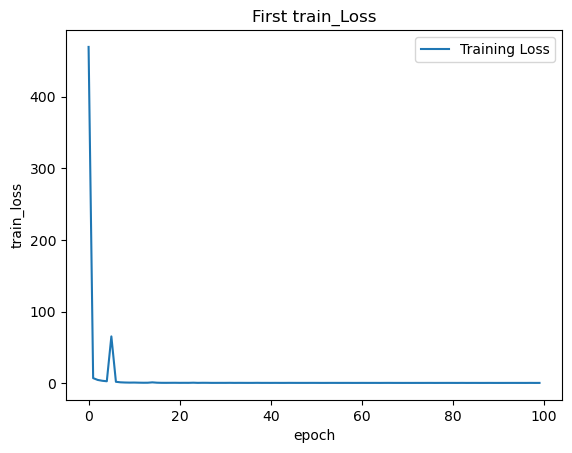

In [52]:
# 将 PyTorch 张量转为 NumPy 数组并去除维度为 1 的维度
# 绘制图表
plt.plot(range(epochs), train_loss_data_1, label='Training Loss')  # 添加 label 参数
plt.xlabel('epoch')
plt.ylabel('train_loss')
plt.title("First train_Loss")
plt.legend()  # 现在这里将显示"Training Loss"
plt.show()


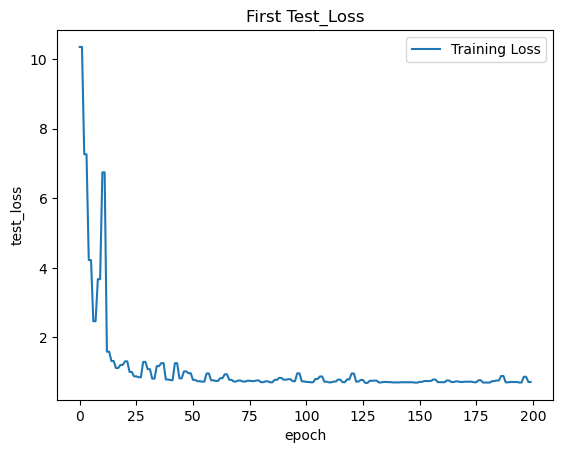

In [53]:
# 绘制图表
plt.plot(range(epochs*2),test_loss_data_1, label='Training Loss')
plt.xlabel('epoch')
plt.ylabel('test_loss')
plt.title("First Test_Loss")
plt.legend()
plt.show()

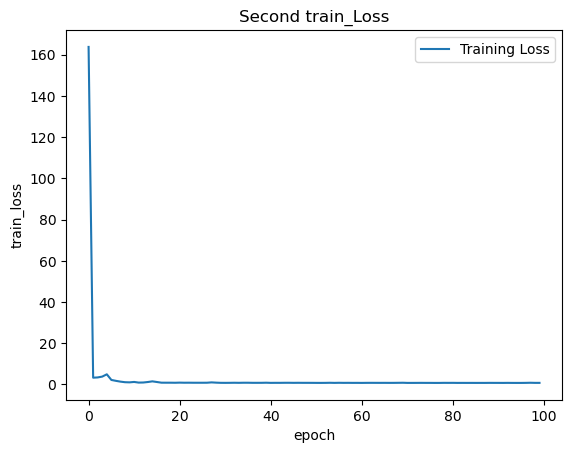

In [54]:
# 绘制图表
plt.plot(range(epochs),train_loss_data_2, label='Training Loss')
plt.xlabel('epoch')
plt.ylabel('train_loss')
plt.title("Second train_Loss")
plt.legend()
plt.show()


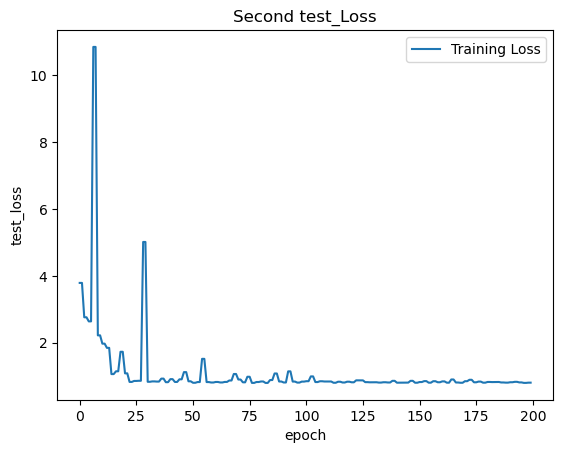

In [55]:
# 绘制图表
plt.plot(range(epochs*2),test_loss_data_2, label='Training Loss')
plt.xlabel('epoch')
plt.ylabel('test_loss')
plt.title("Second test_Loss")
plt.legend()
plt.show()

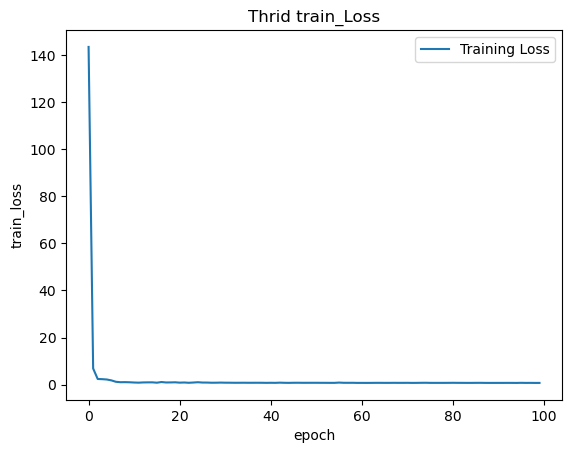

In [56]:
# 绘制图表
plt.plot(range(epochs),train_loss_data_3, label='Training Loss')
plt.xlabel('epoch')
plt.ylabel('train_loss')
plt.title("Thrid train_Loss")
plt.legend()
plt.show()


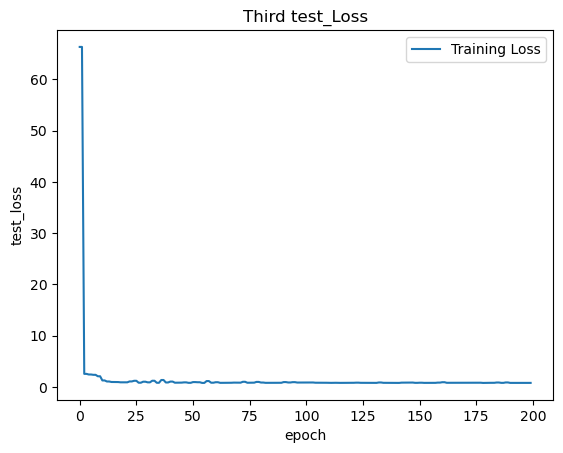

In [57]:
# 绘制图表
plt.plot(range(epochs*2),test_loss_data_3, label='Training Loss')
plt.xlabel('epoch')
plt.ylabel('test_loss')
plt.title("Third test_Loss")
plt.legend()
plt.show()
